In [1]:
from bosonic import GKPQubit
import jax.numpy as jnp

In [2]:
qubit = GKPQubit(params={"delta": 0.25, "d": 2, "N": 10})

In [3]:
plus_z, minus_z = qubit._get_basis_z()
print("|+z> state:", plus_z)
print("|-z> state:", minus_z)

|+z> state: Quantum array: dims = [[10], [1]], shape = (10, 1), type = ket
Qarray data =
[[ 0.        +0.j        ]
 [ 0.07368325+0.31274989j]
 [ 0.        +0.j        ]
 [-0.4549689 -0.27305251j]
 [ 0.        +0.j        ]
 [ 0.07233029+0.44772027j]
 [ 0.        +0.j        ]
 [-0.37329405-0.32322833j]
 [ 0.        +0.j        ]
 [ 0.07978576+0.39915916j]]
|-z> state: Quantum array: dims = [[10], [1]], shape = (10, 1), type = ket
Qarray data =
[[ 0.16071381-1.37298675e-01j]
 [-0.27034805-4.53557380e-02j]
 [ 0.04602732-1.58119862e-01j]
 [ 0.00916435+2.29567492e-01j]
 [ 0.19992465+9.19454677e-02j]
 [ 0.15885145+4.97510399e-01j]
 [-0.05839071-1.67706238e-01j]
 [-0.42779115-4.52418925e-01j]
 [ 0.00130827-1.21413318e-04j]
 [ 0.00863542+2.40613764e-01j]]


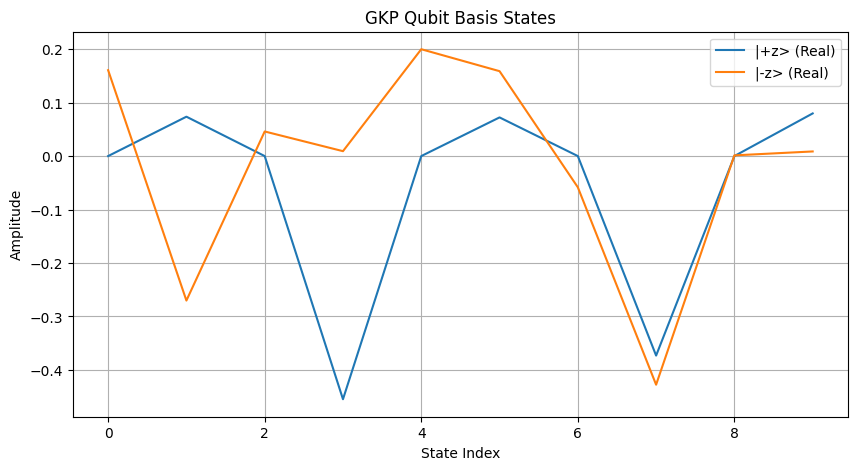

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(plus_z.data.real, label="|+z> (Real)")
plt.plot(minus_z.data.real, label="|-z> (Real)")
plt.legend()
plt.title("GKP Qubit Basis States")
plt.xlabel("State Index")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

In [8]:
# Apply the X gate to the |+z> state
X_gate = qubit.x_U
result = X_gate @ plus_z

print("X gate applied to |+z>:", result)

X gate applied to |+z>: Quantum array: dims = [[10], [1]], shape = (10, 1), type = ket
Qarray data =
[[ 0.16071381-1.37298675e-01j]
 [-0.27034805-4.53557380e-02j]
 [ 0.04602732-1.58119862e-01j]
 [ 0.00916435+2.29567492e-01j]
 [ 0.19992465+9.19454677e-02j]
 [ 0.15885145+4.97510399e-01j]
 [-0.05839071-1.67706238e-01j]
 [-0.42779115-4.52418925e-01j]
 [ 0.00130827-1.21413318e-04j]
 [ 0.00863542+2.40613764e-01j]]


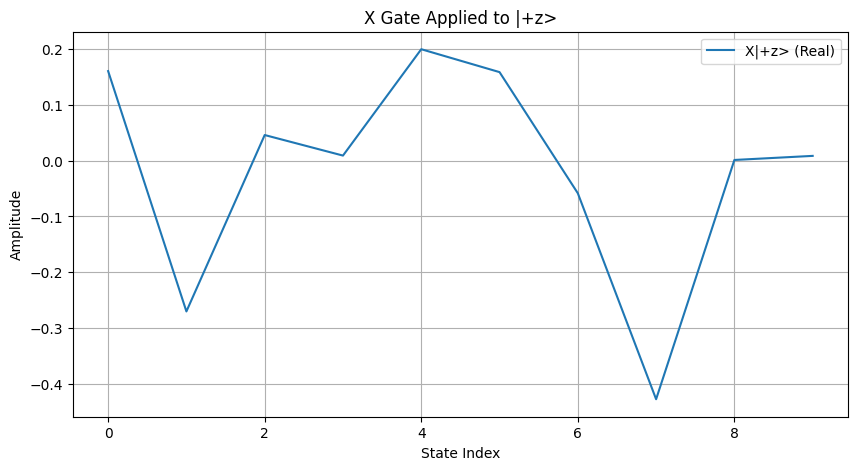

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(result.data.real, label="X|+z> (Real)")
plt.legend()
plt.title("X Gate Applied to |+z>")
plt.xlabel("State Index")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

In [10]:
# Access symmetric stabilizers
S_x = qubit.common_gates["S_x_0"]
S_y = qubit.common_gates["S_y_0"]
S_z = qubit.common_gates["S_z_0"]

print("S_x stabilizer:", S_x)
print("S_y stabilizer:", S_y)
print("S_z stabilizer:", S_z)

S_x stabilizer: Quantum array: dims = [[10], [10]], shape = (10, 10), type = oper
Qarray data =
[[ 4.31822959e-02+0.j  0.00000000e+00+0.j  1.91027775e-01+0.j
   0.00000000e+00+0.j  3.38818730e-01+0.j  0.00000000e+00+0.j
   3.54509157e-01+0.j  0.00000000e+00+0.j  2.11862905e-01+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j -2.26971774e-01+0.j  0.00000000e+00+0.j
  -3.46767649e-01+0.j  0.00000000e+00+0.j -1.10744831e-01+0.j
   0.00000000e+00+0.j  3.38704280e-01+0.j  0.00000000e+00+0.j
   6.35588715e-01+0.j]
 [ 1.91027775e-01+0.j  0.00000000e+00+0.j  3.32807161e-01+0.j
   0.00000000e+00+0.j -7.57195390e-02+0.j  0.00000000e+00+0.j
  -5.74797530e-01+0.j  0.00000000e+00+0.j -5.21069013e-01+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j -3.46767649e-01+0.j  0.00000000e+00+0.j
   1.37105954e-01+0.j  0.00000000e+00+0.j  6.24710183e-01+0.j
   0.00000000e+00+0.j  2.49435291e-01+0.j  0.00000000e+00+0.j
  -3.83561993e-01+0.j]
 [ 3.38818730e-01+0.j  0.00000000e+00+0.j -7.57195390e-02+0.j
   0.0

In [11]:
# Access finite-energy operators
E = qubit.common_gates["E"]
E_inv = qubit.common_gates["E_inv"]

print("Finite-energy operator E:", E)
print("Inverse finite-energy operator E_inv:", E_inv)

Finite-energy operator E: Quantum array: dims = [[10], [10]], shape = (10, 10), type = oper
Qarray data =
[[1.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.93941306+0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.8824969 +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.82902912+0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.77880078+0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.73161563+0.j 0.        +0.j 